In [22]:
import pandas as pd

# Load the dataset
file_path = 'fas_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.600,0.444,0.485,0.863,62,21,10,27,33,51
1,Tyrese Maxey,0.435,0.505,0.452,0.458,0.512,0.361,0.738,105,42,24,41,61,65
2,Stephen Curry,0.432,0.706,0.526,0.467,0.415,0.466,0.907,109,38,30,82,148,107
3,Kentavious Caldwell-Pope,0.422,0.484,0.250,0.448,0.512,0.476,0.767,31,16,29,43,42,30
4,Jevon Carter,0.421,0.483,0.375,0.500,0.321,0.480,0.846,29,16,32,28,50,13


In [23]:
# Checking for missing values
missing_values = df.isnull().sum()

# Checking for basic statistical details for potential outliers
statistical_summary = df.describe()

missing_values, statistical_summary

(Name                           0
 three_pct_season               0
 lwr_paint_pct_oct_nov          0
 upr_paint_pct_oct_nov          0
 mid_pct_oct_nov                0
 three_non_cnr_pct_oct_nov      0
 three_cnr_pct_oct_nov          0
 ft_pct_oct_nov                 0
 lwr_paint_shots_oct_nov        0
 upr_paint_shots_oct_nov        0
 mid_shots_oct_nov              0
 three_non_cnr_shots_oct_nov    0
 three_cnr_shots_oct_nov        0
 ft_shots_oct_nov               0
 dtype: int64,
        three_pct_season  lwr_paint_pct_oct_nov  upr_paint_pct_oct_nov  \
 count        108.000000             108.000000             108.000000   
 mean           0.361176               0.575398               0.435944   
 std            0.039623               0.083720               0.091394   
 min            0.220000               0.278000               0.167000   
 25%            0.337000               0.514000               0.388250   
 50%            0.366500               0.578500               0.4

No missing values! As expected but I wanted to double check just in case. Now let's do a correlation analysis to investige the most relevant features for the prediction model of 3pct prediction model.


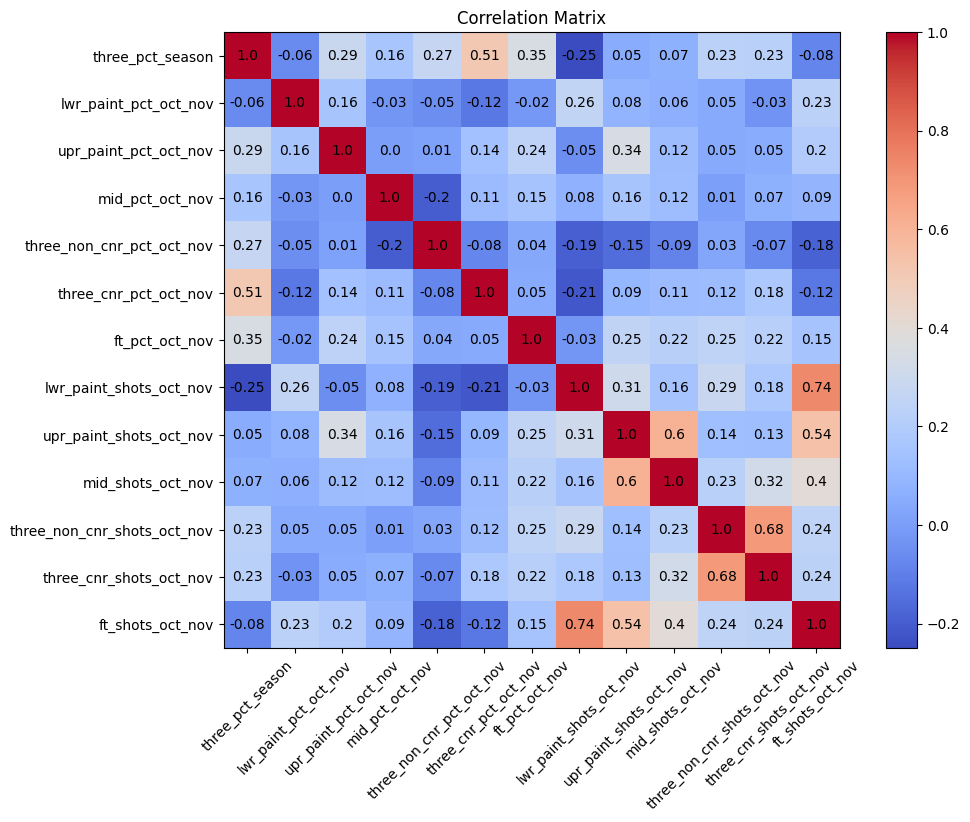

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Adding annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, np.around(correlation_matrix.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix")
plt.show()


# Key Findings from Correlation Analysis
### Strong Positive Correlations:

Corner Three-Point Percentage (Oct-Nov) (three_cnr_pct_oct_nov): The strongest positive correlation (0.51) suggests that players with higher corner three-point percentages in the early season tend to maintain high three-point percentages for the entire season.

Free Throw Percentage (Oct-Nov) (ft_pct_oct_nov): A significant positive correlation (0.35), indicating free-throw efficiency may relate to overall three-point shooting ability.

### Moderate Positive Correlations:

Upper Paint Percentage and Non-Corner Three-Point Percentage (Oct-Nov): These show moderate positive correlations, indicating relevance but to a lesser extent.

### Negative Correlations:

Lower Paint Shots (Oct-Nov) (lwr_paint_shots_oct_nov): This feature has a moderate negative correlation (-0.25), suggesting players who attempt more shots from the lower paint early in the season might have lower overall three-point percentages.

# Feature Selection for the Model
Given these correlations, the following features appear most relevant for predicting the season's three-point percentage:

three_cnr_pct_oct_nov

ft_pct_oct_nov

upr_paint_pct_oct_nov

three_non_cnr_pct_oct_nov

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = ['three_cnr_pct_oct_nov', 'ft_pct_oct_nov', 'upr_paint_pct_oct_nov', 'three_non_cnr_pct_oct_nov']
target = 'three_pct_season'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.0007936038838211434
Mean Absolute Error: 0.018665606640287005


Mean Squared Error: 0.0007936038838211434

Mean Absolute Error: 0.018665606640287005

Therefore the model is quite good! But I still want to evaluate using more advanced techniques


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('fas_2024.csv')

# Feature Engineering: Creating new features or modifying existing ones
# Adding interaction terms
df['three_cnr_interaction'] = df['three_cnr_pct_oct_nov'] * df['three_cnr_shots_oct_nov']
df['ft_shot_interaction'] = df['ft_pct_oct_nov'] * df['ft_shots_oct_nov']

# Experimenting with different combinations of features
features = ['three_cnr_pct_oct_nov', 'ft_pct_oct_nov', 'upr_paint_pct_oct_nov', 
            'three_non_cnr_pct_oct_nov', 'three_cnr_interaction', 'ft_shot_interaction']
target = 'three_pct_season'

X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.0007819591388001858
Mean Absolute Error: 0.019245689928441796


Mean Squared Error (MSE):

Previous Model: 0.000794

Feature-Engineered Model: 0.000782

Analysis: There is a slight decrease in MSE, indicating a marginal improvement in the model's accuracy. The squared nature of MSE means even small improvements can be significant, especially for predictions that require high precision.

Mean Absolute Error (MAE):  
  
Previous Model: 0.01867
  
Feature-Engineered Model: 0.01925
  
Analysis: The MAE has slightly increased, suggesting that the average deviation of predictions from actual values is a bit higher with the new features.

# Interpretation
<ol>
  <li>Decrease in MSE suggests that the feature-engineered model fits the data slightly better overall.</li>
  <li> However, the increase in MAE indicates that the average error per prediction is slightly higher.</li>
</ol>

Now lets use alternate Models like random forest and gradient boosting

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Use the same features as before or experiment with different ones
features = ['three_cnr_pct_oct_nov', 'ft_pct_oct_nov', 'upr_paint_pct_oct_nov', 
            'three_non_cnr_pct_oct_nov', 'three_cnr_interaction', 'ft_shot_interaction']
target = 'three_pct_season'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Random Forest Predictions
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Gradient Boosting Predictions
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Output the performance metrics
print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - Mean Absolute Error:", rf_mae)
print("Gradient Boosting - Mean Squared Error:", gb_mse)
print("Gradient Boosting - Mean Absolute Error:", gb_mae)


Random Forest - Mean Squared Error: 0.001198859513636363
Random Forest - Mean Absolute Error: 0.025278636363636333
Gradient Boosting - Mean Squared Error: 0.0013615196290816594
Gradient Boosting - Mean Absolute Error: 0.02899504355149217


### Results Analysis

#### Random Forest
- **MSE**: 0.001199
- **MAE**: 0.02528

#### Gradient Boosting
- **MSE**: 0.001362
- **MAE**: 0.02900

#### Comparison to Linear Regression (Previous Best)
- **Linear Regression MSE**: 0.000782
- **Linear Regression MAE**: 0.01925

### Interpretation
- Both Random Forest and Gradient Boosting models performed worse than the Linear Regression model based on these metrics.
- This suggests that for this particular dataset and problem, the simpler Linear Regression model is more effective than these more complex algorithms.
- It's possible that the complexity of Random Forest and Gradient Boosting leads to overfitting on the training data, which reduces their performance on the test data.
